C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\1090889319.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(cats.categories))
C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\1090889319.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(cats.categories))
C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\1090889319.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.ge

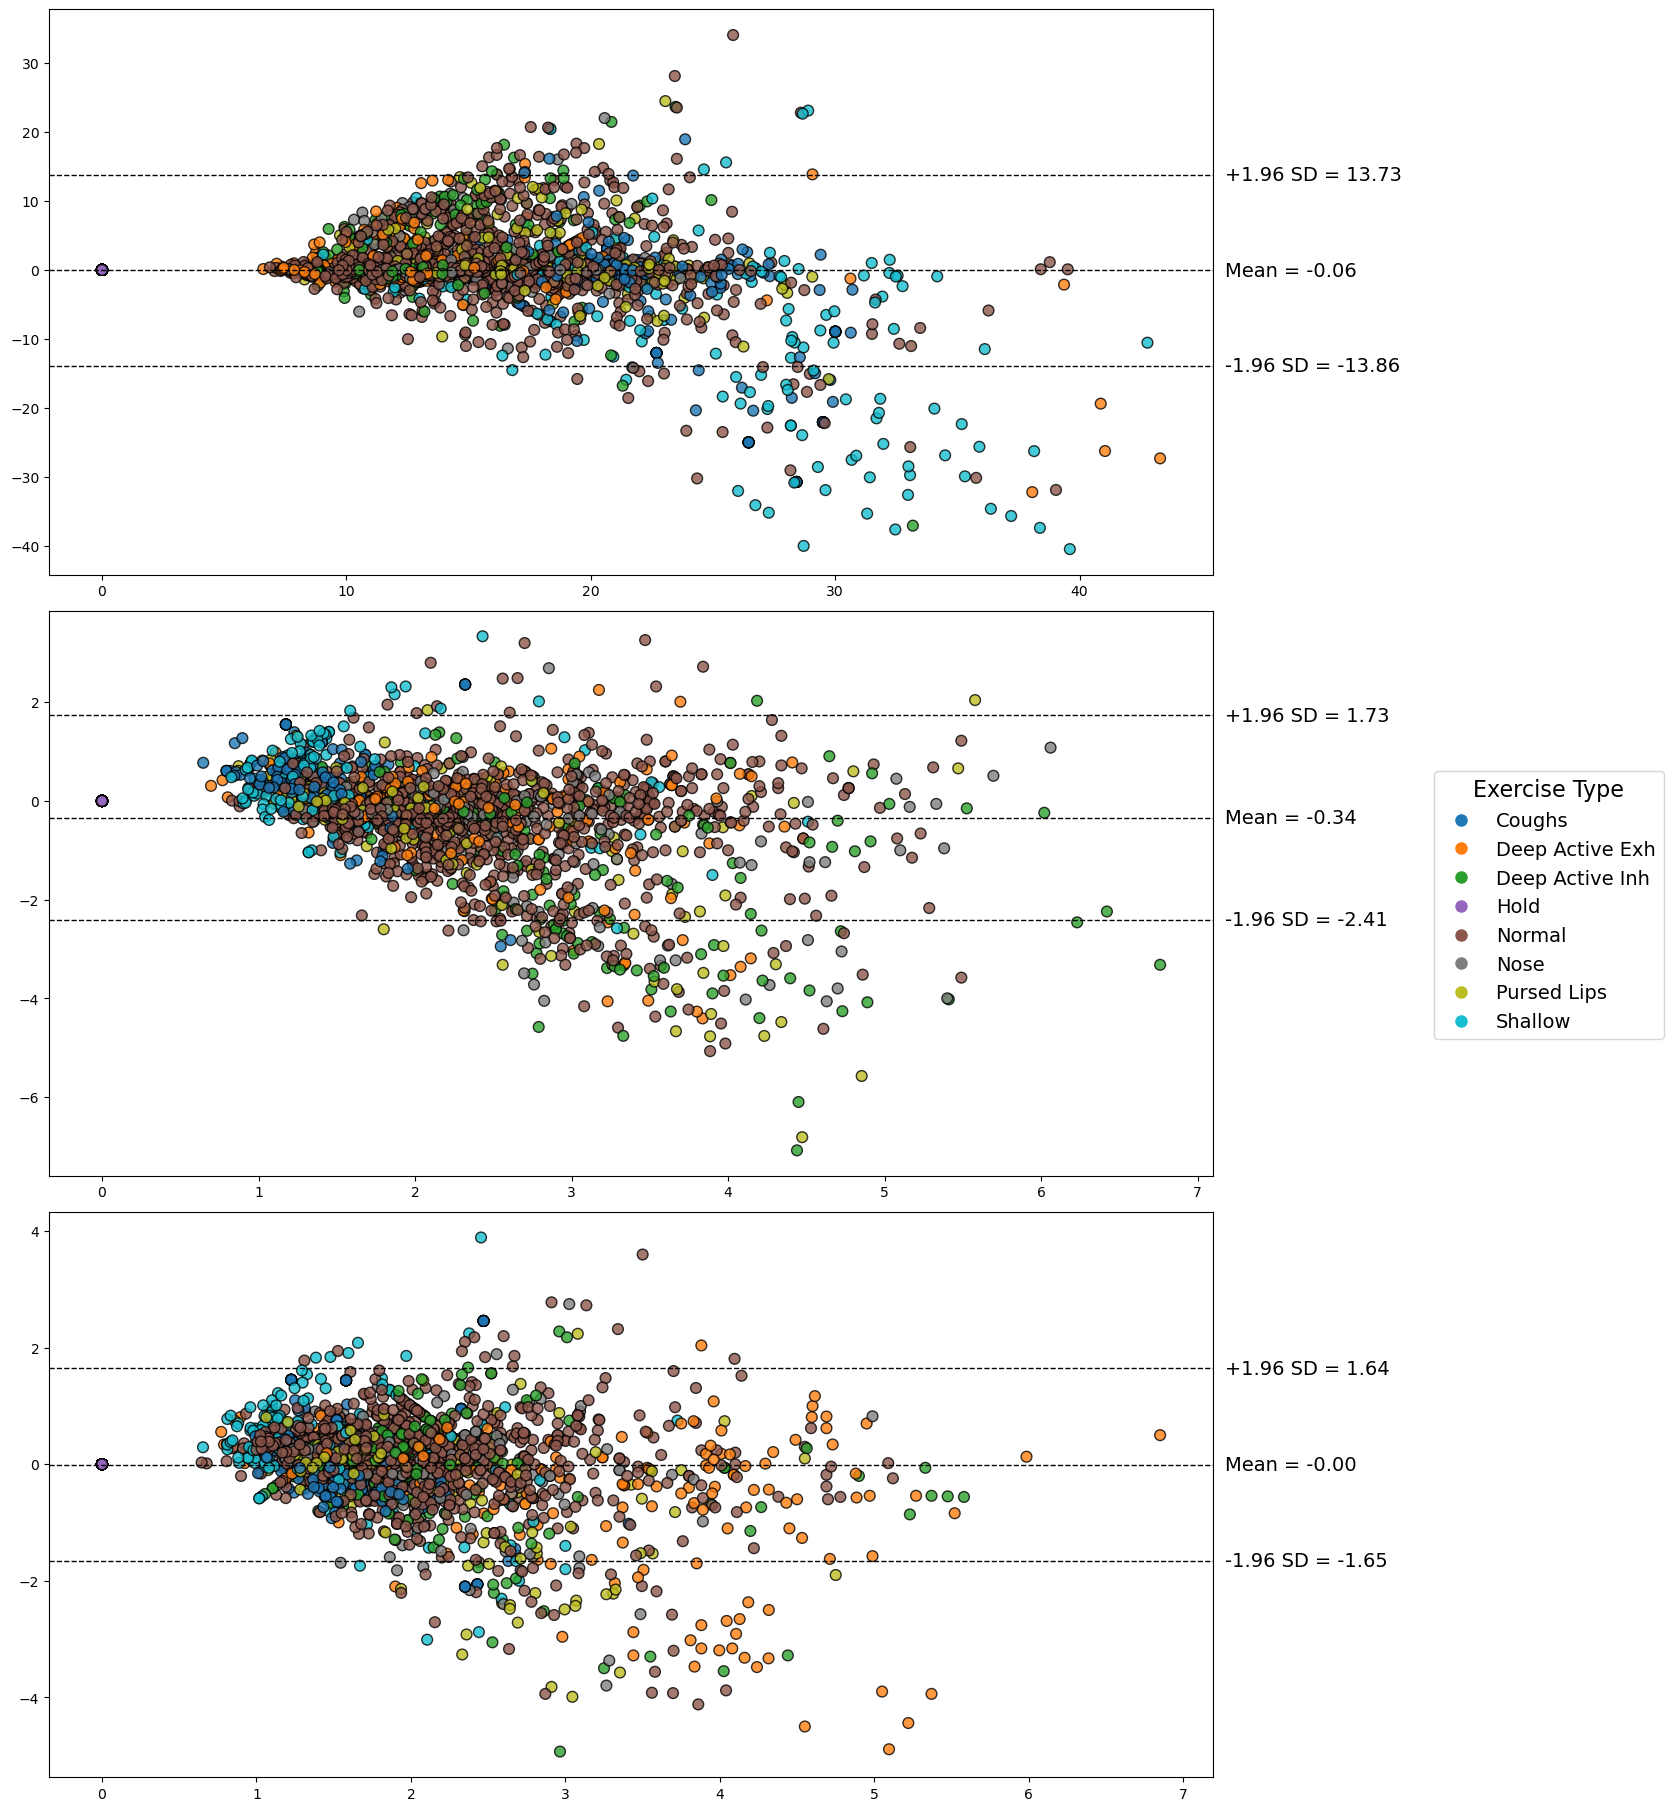

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
def bland_altman_plot(ax, estimated, gold, hue=None, title="", xlabel="Mean", ylabel="Diff"):
    est  = np.asarray(estimated)
    gold_arr = np.asarray(gold)
    mean = (est + gold_arr) / 2
    diff = est - gold_arr

    m  = np.nanmean(diff)
    sd = np.nanstd(diff)
    up, lo = m + 1.96 * sd, m - 1.96 * sd


    s = 60
    if hue is None:
        ax.scatter(mean, diff, edgecolor="k", alpha=.7, s=s)
    else:
        cats = pd.Categorical(hue)
        cmap = plt.cm.get_cmap("tab10", len(cats.categories))
        colours = cmap(cats.codes)
        ax.scatter(mean, diff, c=colours, edgecolor="k", alpha=.8, s=s)


    for y, lab in ((m, "Mean"), (up, "+1.96 SD"), (lo, "-1.96 SD")):
        ax.axhline(y, ls="--", color="black", lw=1)
        ax.text(1.01, y, f"{lab} = {y:.2f}", va="center", ha="left",
                transform=ax.get_yaxis_transform(), fontsize=14, clip_on=False)



df = pd.read_excel("C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/breath_merics_dataset_QRS_with_exercise_hold_both.xlsx")
hue_data = df["exercise"]


fig, axes = plt.subplots(3, 1, figsize=(14, 18), constrained_layout=True)


bland_altman_plot(axes[0],
    estimated = df["EDR_BPM"], gold = df["gold_BPM"],
    hue = hue_data,
    title = "Breathing Rate Per Minute (BPM)",
    xlabel = "Mean (BPM)",
    ylabel = "Difference (EDR – Gold)"
)

bland_altman_plot(axes[1],
    estimated = df["TrueInspDuration"], gold = df["gold_TrueInspDuration"],
    hue = hue_data,
    title = "Inspiration Duration",
    xlabel = "Mean (s)",
    ylabel = "Δ Duration (s)"
)

bland_altman_plot(axes[2],
    estimated = df["TrueExpDuration"], gold = df["gold_TrueExpDuration"],
    hue = hue_data,
    title = "Expiration Duration",
    xlabel = "Mean (s)",
    ylabel = "Δ Duration (s)"
)


categories   = pd.Categorical(hue_data).categories
cmap         = plt.cm.get_cmap("tab10", len(categories))
legend_lines = [
    plt.Line2D([], [], marker="o", linestyle="",
               color=cmap(i), label=cat, markersize=8)
    for i, cat in enumerate(categories)
]
fig.legend(
    handles        = legend_lines,
    title          = "Exercise Type",
    loc            = "center left",
    bbox_to_anchor = (1.02, 0.5),
    borderaxespad  = 0,
    fontsize       = 14,
    title_fontsize = 16
)


output_path = "bland_altman_panels.png"
fig.savefig(output_path, dpi=300, bbox_inches="tight")

plt.show()






In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel("C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/breath_merics_dataset_QRS_with_exercise_hold_both.xlsx")


def bland_altman_stats_per_group(df, estimate_col, gold_col, group_col):
    def compute_stats(group):
        est = group[estimate_col].values
        gold = group[gold_col].values
        diff = est - gold
        m = np.nanmean(diff)
        sd = np.nanstd(diff)
        return pd.Series({
            "Mean Diff": m,
            "+1.96 SD": m + 1.96 * sd,
            "-1.96 SD": m - 1.96 * sd
        })

    return df.groupby(group_col).apply(compute_stats).reset_index()


bpm_stats = bland_altman_stats_per_group(df, "EDR_BPM", "gold_BPM", "exercise")
insp_stats = bland_altman_stats_per_group(df, "TrueInspDuration", "gold_TrueInspDuration", "exercise")
exp_stats = bland_altman_stats_per_group(df, "TrueExpDuration", "gold_TrueExpDuration", "exercise")

bpm_stats["Metric"] = "BPM"
insp_stats["Metric"] = "Inspiration Duration"
exp_stats["Metric"] = "Expiration Duration"


summary_table = pd.concat([bpm_stats, insp_stats, exp_stats], ignore_index=True)
summary_table = summary_table[["exercise", "Metric", "Mean Diff", "+1.96 SD", "-1.96 SD"]]


print(summary_table.to_string(index=False))



       exercise               Metric  Mean Diff  +1.96 SD   -1.96 SD
         Coughs                  BPM  -4.283084 14.489467 -23.055635
Deep Active Exh                  BPM   0.845034 11.744741 -10.054673
Deep Active Inh                  BPM   3.199456 15.762265  -9.363352
           Hold                  BPM   0.000000  0.000000   0.000000
         Normal                  BPM   0.558458 11.996482 -10.879567
           Nose                  BPM   1.617057 10.103408  -6.869294
    Pursed Lips                  BPM   1.274840 10.636552  -8.086871
        Shallow                  BPM  -7.246771 17.328425 -31.821967
         Coughs Inspiration Duration   0.326592  1.823329  -1.170146
Deep Active Exh Inspiration Duration  -0.384502  1.730215  -2.499220
Deep Active Inh Inspiration Duration  -1.129898  1.943778  -4.203573
           Hold Inspiration Duration   0.000000  0.000000   0.000000
         Normal Inspiration Duration  -0.376978  1.443120  -2.197076
           Nose Inspiration Durati

C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\2665590833.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(compute_stats).reset_index()
C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\2665590833.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(compute_stats).reset_index()
C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\2665

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_excel("C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/breath_metrics_dataset_with_exercise_hold_both_RRI.xlsx")


def bland_altman_stats_per_group(df, estimate_col, gold_col, group_col):
    def compute_stats(group):
        est = group[estimate_col].values
        gold = group[gold_col].values
        diff = est - gold
        m = np.nanmean(diff)
        sd = np.nanstd(diff)
        return pd.Series({
            "Mean Diff": m,
            "+1.96 SD": m + 1.96 * sd,
            "-1.96 SD": m - 1.96 * sd
        })

    return df.groupby(group_col).apply(compute_stats).reset_index()


bpm_stats = bland_altman_stats_per_group(df, "EDR_BPM", "gold_BPM", "exercise")
insp_stats = bland_altman_stats_per_group(df, "TrueInspDuration", "gold_TrueInspDuration", "exercise")
exp_stats = bland_altman_stats_per_group(df, "TrueExpDuration", "gold_TrueExpDuration", "exercise")


bpm_stats["Metric"] = "BPM"
insp_stats["Metric"] = "Inspiration Duration"
exp_stats["Metric"] = "Expiration Duration"


summary_table = pd.concat([bpm_stats, insp_stats, exp_stats], ignore_index=True)
summary_table = summary_table[["exercise", "Metric", "Mean Diff", "+1.96 SD", "-1.96 SD"]]

print(summary_table.to_string(index=False))



       exercise               Metric  Mean Diff  +1.96 SD   -1.96 SD
         Coughs                  BPM  -7.132274 11.421106 -25.685654
Deep Active Exh                  BPM  -0.483949 14.342204 -15.310101
Deep Active Inh                  BPM   0.399163 11.136757 -10.338431
           Hold                  BPM   0.000000  0.000000   0.000000
         Normal                  BPM  -1.222136 10.980571 -13.424843
           Nose                  BPM   0.332154  7.374102  -6.709793
    Pursed Lips                  BPM  -1.519256  8.738668 -11.777181
        Shallow                  BPM -10.452865 15.508567 -36.414298
         Coughs Inspiration Duration   1.080927  3.601952  -1.440098
Deep Active Exh Inspiration Duration   0.702331  3.346691  -1.942029
Deep Active Inh Inspiration Duration  -0.331620  2.711649  -3.374889
           Hold Inspiration Duration   0.000000  0.000000   0.000000
         Normal Inspiration Duration   0.119343  2.681401  -2.442716
           Nose Inspiration Durati

C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\1141335984.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(compute_stats).reset_index()
C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\1141335984.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(compute_stats).reset_index()
C:\Users\visnu\AppData\Local\Temp\ipykernel_33656\1141

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_excel("final_dataset_breath_segmentation_adaptive_with_exercise_without_hold_both_test_after_10_combined.xlsx")


def bland_altman_stats_per_group(df, estimate_col, gold_col, group_col):
    def compute_stats(group):
        est = group[estimate_col].values
        gold = group[gold_col].values
        diff = est - gold
        m = np.nanmean(diff)
        sd = np.nanstd(diff)
        return pd.Series({
            "Mean Diff": m,
            "+1.96 SD": m + 1.96 * sd,
            "-1.96 SD": m - 1.96 * sd
        })

    return df.groupby(group_col).apply(compute_stats).reset_index()


bpm_stats = bland_altman_stats_per_group(df, "EDR_BPM", "gold_BPM", "exercise")
insp_stats = bland_altman_stats_per_group(df, "TrueInspDuration", "gold_TrueInspDuration", "exercise")
exp_stats = bland_altman_stats_per_group(df, "TrueExpDuration", "gold_TrueExpDuration", "exercise")


bpm_stats["Metric"] = "BPM"
insp_stats["Metric"] = "Inspiration Duration"
exp_stats["Metric"] = "Expiration Duration"


summary_table = pd.concat([bpm_stats, insp_stats, exp_stats], ignore_index=True)
summary_table = summary_table[["exercise", "Metric", "Mean Diff", "+1.96 SD", "-1.96 SD"]]


print(summary_table.to_string(index=False))

